![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
# Here you run your code to explore the data
rt_reviews = pd.read_csv('data/zippedData/rotten_tomatoes_critic_reviews.csv.gz')
rt_reviews[rt_reviews['rotten_tomatoes_link'] == 'm/10004069-whore']

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
1099,m/10004069-whore,Marc Savlov,False,Austin Chronicle,Rotten,2/5,2004-05-01,Director Russell is gifted with an eye for the...
1100,m/10004069-whore,Frank Scheck,True,Hollywood Reporter,Rotten,NaN,2004-05-24,Whore isn't titillating enough to appeal to th...
1101,m/10004069-whore,Leslie Camhi,True,Village Voice,Rotten,NaN,2004-12-14,"The subjects can be amusing, chilling, or trag..."
1102,m/10004069-whore,Dave Kehr,True,New York Times,Rotten,1/5,2004-12-16,"Whore, directed by the Spanish filmmaker who u..."
1103,m/10004069-whore,Ken Fox,False,TV Guide,Rotten,2/5,2004-12-17,Is there anything remotely new left to be said...
1104,m/10004069-whore,Elizabeth Weitzman,True,New York Daily News,Rotten,1/4,2004-12-17,A shallow film.


Clean up this table, start by investigating the number of null values when compared to the length of the dataframe.

In [129]:
dict(rt_reviews['review_score'].value_counts())

{'3/5': 90273,
 '4/5': 83659,
 '3/4': 72366,
 '2/5': 60174,
 '2/4': 47546,
 '2.5/4': 44994,
 '3.5/4': 34371,
 '3.5/5': 30885,
 'B': 24358,
 '5/5': 24139,
 '2.5/5': 21260,
 '1/5': 20709,
 '1.5/4': 20475,
 'B+': 19822,
 '4/4': 18239,
 'B-': 15754,
 '1/4': 14905,
 'C': 14329,
 '7/10': 12491,
 '4.5/5': 12388,
 'A-': 11410,
 '8/10': 11243,
 'C+': 10863,
 'A': 9482,
 'C-': 9449,
 '6/10': 9391,
 '1.5/5': 8235,
 '5/10': 6961,
 '9/10': 6216,
 'D': 6148,
 '4/10': 5133,
 'D+': 3802,
 '3/10': 3075,
 '0.5/4': 2892,
 '0/5': 2448,
 '0/4': 2435,
 '10/10': 2431,
 'F': 1896,
 '2/10': 1627,
 'D-': 1605,
 '7.5/10': 1577,
 '0.5/5': 1457,
 '8.5/10': 1382,
 '6.5/10': 1308,
 '5.5/10': 692,
 '1/10': 631,
 '4.5/10': 594,
 '9.5/10': 556,
 '3': 387,
 '3/6': 332,
 '4': 324,
 '2/6': 293,
 '3.5/10': 282,
 '87/100': 278,
 '88/100': 261,
 '85/100': 260,
 '86/100': 246,
 '82/100': 222,
 '83/100': 212,
 '70/100': 204,
 '80/100': 202,
 '4/6': 202,
 '76/100': 201,
 '90/100': 194,
 '68/100': 189,
 '75/100': 186,
 '71/100':

In [417]:
print('The length of this dataframe is {}'.format(len(rt_reviews)))
rt_reviews.isna().sum()
rt_movies.head()
rt_movies.columns

The length of this dataframe is 1130017


Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [474]:
# rt_movies.dropna(subset=['genres'], axis=0, inplace=True)
# rt_movies.head()
genres = []
for entry in rt_movies['genres']:
    #print(type(entry))
    #entry = entry.split(',')
    for word in entry.split(','):
#         word = word.replace('&', 'and')
#         word = word.replace(' ', '')
        word = word.strip()
        word = word.lower()
        genres.append(word)
        #print(type(word))
#print(genres)

def genrecounter(anylist):
    dict_gen = {}
    for entry in anylist:
    #print(type(entry))
        if entry in dict_gen:
            dict_gen[entry] += 1
        else:
            dict_gen[entry] = 1
    return dict(sorted(dict_gen.items(), key = lambda item: item[1], reverse = True))


# print(genres[0])
genre_dict = genrecounter(genres)
x_values = list(genre_dict.keys())
y_values = list(genre_dict.values())




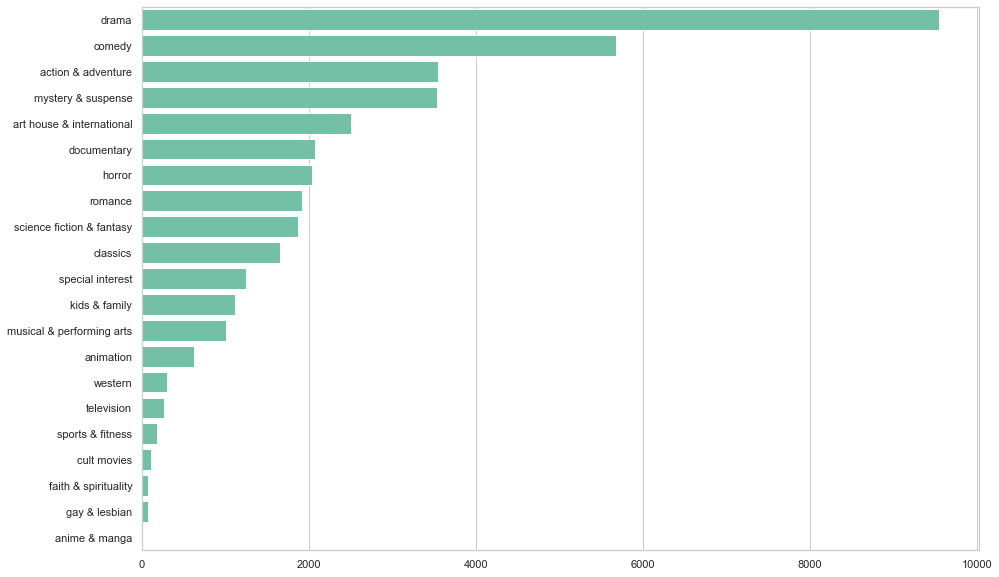

In [479]:
plt.figure(figsize = (15,10))
sns.barplot(y = x_values, x = y_values, color = 'mediumaquamarine');

In [18]:
rt_movies = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
rt_movies.iloc[24]

rotten_tomatoes_link                                                 m/10004069-whore
movie_title                                                                     Whore
movie_info                          Encouraged by her neighbor (Daryl Hannah), a f...
critics_consensus                                                                 NaN
content_rating                                                                      R
genres                                               Art House & International, Drama
directors                                                                 María Lidón
authors                                                   Adela Ibañez, Isabel Pisano
actors                              Daryl Hannah, Denise Richards, Joaquim de Alme...
original_release_date                                                      2004-04-16
streaming_release_date                                                     2014-02-04
runtime                                               

In [422]:
print('The length of this dataframe is {}'.format(len(rt_movies)))
rt_movies.isna().sum()

The length of this dataframe is 17693


rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8561
content_rating                         0
genres                                 0
directors                            194
authors                             1539
actors                               351
original_release_date               1154
streaming_release_date               384
runtime                              314
production_company                   495
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [22]:
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [23]:
print('The length of this dataframe is {}'.format(len(imdb_ratings)))
imdb_ratings.isna().sum()

The length of this dataframe is 73856


tconst           0
averagerating    0
numvotes         0
dtype: int64

In [24]:
imdb_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


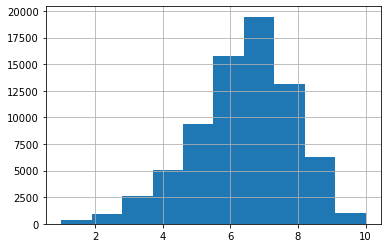

In [27]:
imdb_ratings['averagerating'].hist();

In [28]:
imdb_ratings.duplicated(subset='tconst').sum()

0

In [29]:
imdb_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [30]:
print('The length of this dataframe is {}'.format(len(imdb_basics)))
imdb_basics.isna().sum()

The length of this dataframe is 146144


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [31]:
imdb_basics.duplicated(subset='tconst').sum()

0

In [42]:
imdb_basics[imdb_basics.duplicated(subset='original_title', keep=False)].sort_values('original_title').iloc[2000:2025]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
109309,tt6419630,Carmen,Carmen,2010,NaN,NaN
101241,tt5918816,Carmilla,Carmilla,2015,NaN,Horror
15407,tt1736556,Carmilla,Carmilla,2010,70.0,Action
120872,tt7280218,Carmilla,Carmilla,2019,96.0,"Drama,Fantasy,Romance"
47786,tt2836238,Carnets d'un grand détour,Carnets d'un grand détour,2012,94.0,Documentary
64723,tt3705804,Carnets d'un grand détour,Carnets d'un grand détour,2011,93.0,"Documentary,Family"
99828,tt5833234,Carrion,Carrion,2016,73.0,NaN
4607,tt10419672,Carrion,Carrion,2020,NaN,Horror
76758,tt4391714,Cartas a María,Cartas a María,2015,NaN,Documentary
109792,tt6446764,Cartas a María,Cartas a María,2015,NaN,NaN


In [51]:
imdb_ratings.merge(imdb_basics, how='left', on=['tconst']).head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [47]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [49]:
imdb_name = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [743]:
imdb_name[imdb_name['primary_name'].str.contains('Sergio Pablos')]

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
34384,nm0655053,Sergio Pablos,NaN,NaN,"animation_department,writer,producer","tt1323594,tt1436562,tt0133240,tt0119282"


In [50]:
print('The length of this dataframe is {}'.format(len(imdb_name)))
imdb_name.isna().sum()

The length of this dataframe is 606648


nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [52]:
tmdb = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [53]:
print('The length of this dataframe is {}'.format(len(tmdb)))
tmdb.isna().sum()

The length of this dataframe is 26517


genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [200]:
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [201]:
print('The length of this dataframe is {}'.format(len(budgets)))
budgets.isna().sum()

The length of this dataframe is 5782


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [56]:
gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [57]:
print('The length of this dataframe is {}'.format(len(gross)))
gross.isna().sum()

The length of this dataframe is 3387


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [58]:
akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [59]:
print('The length of this dataframe is {}'.format(len(akas)))
akas.isna().sum()

The length of this dataframe is 331703


title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [60]:
crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [61]:
print('The length of this dataframe is {}'.format(len(crew)))
crew.isna().sum()

The length of this dataframe is 146144


tconst           0
directors     5727
writers      35883
dtype: int64

In [69]:
principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
print('The length of this dataframe is {}'.format(len(principals)))
principals.isna().sum()

The length of this dataframe is 1028186


tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [63]:
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [744]:
principals[principals['nconst'] == 'nm0655053']

,tconst,ordering,nconst,category,job,characters
172720,tt1323594,9,nm0655053,writer,based on a story by,NaN
604027,tt4729430,5,nm0655053,director,NaN,NaN
815157,tt6182908,10,nm0655053,writer,"based on the book ""Yeti Tracks"" by",NaN


In [741]:
principals['category'].value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [64]:
crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [66]:
akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


At first glance this table may appear to offer very little, but it may be worth investigating if there is a correlation between number of foreign titles and the profit a movie makes. 

In [97]:
akas['title_id'].value_counts()

tt2488496    61
tt2310332    55
tt1201607    55
tt2948356    53
tt2278871    53
             ..
tt4337210     1
tt1723780     1
tt4839200     1
tt7137008     1
tt1810693     1
Name: title_id, Length: 122302, dtype: int64

In [67]:
imdb_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [68]:
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [71]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [72]:
basics_merged = imdb_basics.merge(imdb_ratings, how='left', on=['tconst'])
basics_merged.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [73]:
print('The length of this dataframe is {}'.format(len(basics_merged)))
basics_merged.isna().sum()

The length of this dataframe is 146144


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [78]:
basics_merged.dropna(subset=['averagerating'], axis = 0, inplace=True)
print('The length of this dataframe is {}'.format(len(basics_merged)))
basics_merged.isna().sum()

The length of this dataframe is 73856


tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

dropping rows with null values in both genre and runtime minutes will still leave a database with over 65,000 movie titles which is ample for this analysis.

In [79]:
basics_merged.dropna(subset=['genres', 'runtime_minutes'], axis = 0, inplace=True)
print('The length of this dataframe is {}'.format(len(basics_merged)))
basics_merged.isna().sum()

The length of this dataframe is 65720


tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [80]:
basics_merged.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0


<AxesSubplot:>

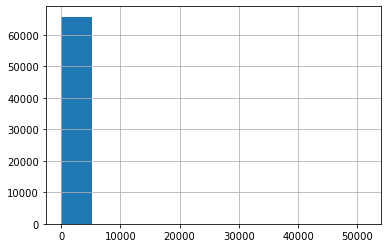

In [90]:
basics_merged['runtime_minutes'].hist()

Clearly this is an error, lets find out more using the describe function.

The average rating information here makes up too large a percentage for it to be useful, if the mean or the median were to be imputed here, it would not be of value.

In [92]:
basics_merged[basics_merged['runtime_minutes'] > 240].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 70 to 142001
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           79 non-null     object 
 1   primary_title    79 non-null     object 
 2   original_title   79 non-null     object 
 3   start_year       79 non-null     int64  
 4   runtime_minutes  79 non-null     float64
 5   genres           79 non-null     object 
 6   averagerating    79 non-null     float64
 7   numvotes         79 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.6+ KB


This is telling me there are 79 entries in which the runtime is over 4 hours long, this is most likely a data entry error and if not, only 79 will be deleted so it will not have a big impact from insights drawn from runtime

<AxesSubplot:>

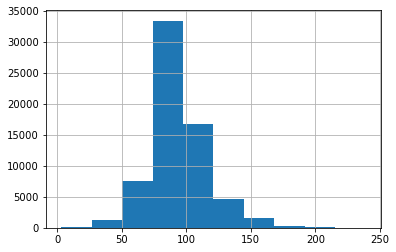

In [95]:
basics_merged = basics_merged[basics_merged['runtime_minutes'] < 240]
basics_merged['runtime_minutes'].hist(bins = 10)

<AxesSubplot:>

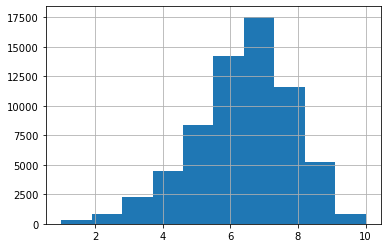

In [96]:
basics_merged['averagerating'].hist(bins = 10)

In [119]:
basics_merged[basics_merged.duplicated(subset='primary_title', keep = False)].sort_values('primary_title', ascending=False)[:50]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
23712,tt1961689,Éden,Éden,2011,64.0,Documentary,7.1,8.0
37636,tt2362758,Éden,Éden,2013,73.0,Drama,6.1,50.0
55644,tt3257638,Zurich,Zurich,2015,89.0,Drama,6.0,385.0
55077,tt3229936,Zurich,Und morgen mittag bin ich tot,2013,103.0,Drama,7.2,214.0
66004,tt3763866,Zoom,Zoom,2015,96.0,"Animation,Comedy,Drama",6.1,2323.0
99511,tt5815346,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",7.2,85.0
64336,tt3688342,Zoo,Zoo,2017,97.0,"Family,History,War",6.7,630.0
125232,tt7624934,Zoo,Zoo,2018,95.0,"Comedy,Drama,Horror",5.4,330.0
32324,tt2215801,Zoo,Zoo,2012,120.0,Drama,7.2,23.0
13647,tt1693105,Zoo,Zoo,2010,84.0,"Action,Comedy",4.2,12.0


There are many duplicate names on primary title, it seems unreasonable to delete any of these as they may well just be movies or even remakes of the same name. There is no way to determine whether or not this is the case. 

In [120]:
basics_merged.sort_values('averagerating', ascending=False)[:50]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
16767,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5.0
117359,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
120584,tt7259300,Calamity Kevin,Calamity Kevin,2019,77.0,"Adventure,Comedy",10.0,6.0
93040,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5.0
44279,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5.0
71954,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
136750,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5.0
4016,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5.0
107499,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,10.0,5.0
85712,tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8.0


It is clear by sorting the table by average rating it shows there is an issue, the average rating will be heavily influence by the number of votes the movie received. In order to draw meaningful analysis from the average rating, it would make sense to apply a filter.

In [122]:
basics_merged['numvotes'].describe()

count    6.563300e+04
mean     3.958031e+03
std      3.210812e+04
min      5.000000e+00
25%      1.600000e+01
50%      6.200000e+01
75%      3.520000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

The mean number of votes is 3958, this seems a reasonable number to use when filtering the average rating.

In [125]:
basics_merged[basics_merged['numvotes']>100000].sort_values('averagerating', ascending=False)[:50]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
99483,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",9.3,100568.0
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135.0
311,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
80655,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",8.5,210869.0
87402,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",8.5,123638.0
72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
43376,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",8.5,616916.0
13044,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343.0
38424,tt2380307,Coco,Coco,2017,105.0,"Adventure,Animation,Comedy",8.4,277194.0


In [116]:
dict(basics_merged['genres'].value_counts())

{'Drama': 10175,
 'Documentary': 9109,
 'Comedy': 4604,
 'Comedy,Drama': 2451,
 'Horror': 2231,
 'Drama,Romance': 1392,
 'Thriller': 1288,
 'Comedy,Drama,Romance': 1159,
 'Comedy,Romance': 1127,
 'Horror,Thriller': 943,
 'Drama,Thriller': 938,
 'Action': 719,
 'Biography,Documentary': 675,
 'Documentary,Drama': 572,
 'Documentary,Music': 542,
 'Action,Crime,Drama': 530,
 'Romance': 529,
 'Comedy,Horror': 514,
 'Crime,Drama,Thriller': 493,
 'Biography,Documentary,History': 474,
 'Crime,Drama': 464,
 'Drama,Family': 459,
 'Documentary,History': 457,
 'Family': 419,
 'Biography,Documentary,Drama': 374,
 'Horror,Mystery,Thriller': 364,
 'Action,Drama': 351,
 'Drama,Horror,Thriller': 342,
 'Action,Thriller': 316,
 'Comedy,Drama,Family': 304,
 'Drama,Mystery,Thriller': 299,
 'Documentary,Sport': 297,
 'Action,Comedy': 287,
 'Animation': 283,
 'Action,Adventure,Comedy': 239,
 'Biography,Documentary,Music': 234,
 'Sci-Fi': 234,
 'Adventure,Animation,Comedy': 234,
 'Biography,Drama': 234,
 'Act

<AxesSubplot:xlabel='start_year'>

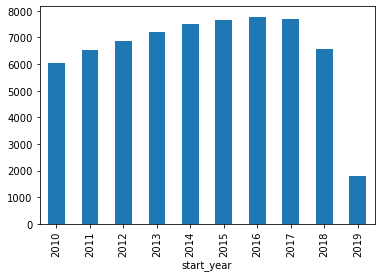

In [127]:
basics_merged.groupby('start_year').count()['original_title'].plot(kind='bar')

In [202]:
print(len(budgets))
budgets.head()


5782


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [203]:
print(budgets['release_date'][1])
type(budgets['release_date'][1])

May 20, 2011


str

In [204]:
print(len(budgets))
budgets.head()

5782


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [206]:
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
print(budgets['release_date'][1])
type(budgets['release_date'][1])
# budgets["release_date"].dt.strftime("%Y/%m/%d")

2011-05-20 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [208]:
def convert_to_number(df, col):
    #print(series)
    df[col] = df[col].str.replace(',','')
    #print(series)
    df[col] = df[col].str.replace('$','')
    #print(series)
    df[col] = df[col].astype(float)
    return df[col]

In [209]:
convert_to_number(budgets, 'production_budget')
convert_to_number(budgets, 'domestic_gross')
convert_to_number(budgets, 'worldwide_gross')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [229]:
# One of the main factors I will use in this analysis is profit, which is the worldwide gross minus the production budget
budgets['profit_million'] = ((budgets['worldwide_gross'] - budgets['production_budget']) / 1000000)

In [231]:
# I will also use the capital efficiency (return on investment) - it is a strategic decision which metric Microsoft would use
budgets['roi'] = ((budgets['profit_million'] * 1000000) / budgets['production_budget'])

In [212]:
budgets.head()
print('The length of this dataframe is {}'.format(len(budgets)))
budgets.isna().sum()
budgets.describe()

The length of this dataframe is 5782


,id,production_budget,domestic_gross,worldwide_gross,profit_million,roi
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,59.907990,3.775937
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,146.087439,29.492836
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-200.000000,-1.830000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.000000,-0.360000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,9.000000,0.680000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,61.000000,2.710000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2351.000000,1800.000000


#### It is not likely that any film in the world would have had a worldwide gross of zero dollars. The reason for this must be either error, or the movie has not been released. Either way it is impacting the range and needs to be corrected

In [213]:
len(budgets[budgets['worldwide_gross'] == 0])

367

In [214]:
len(budgets[(budgets['worldwide_gross'] == 0) & (budgets['domestic_gross']==0)])

367

In [216]:
budgets = budgets[(budgets['worldwide_gross'] != 0) & (budgets['domestic_gross']!=0)]

In [508]:
print('The length of this dataframe is {}'.format(len(budgets)))
budgets.isna().sum()
budgets.describe()
budgets[(budgets['roi']>0) & (budgets['roi']<1)]

The length of this dataframe is 5234


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_million,roi,budget_million,year,month
11,12,2018-05-25,Solo: A Star Wars Story,275000000.0,213767512.0,393151347.0,118.151347,0.429641,275.00,2018,5
13,14,2012-03-09,John Carter,275000000.0,73058679.0,282778100.0,7.778100,0.028284,275.00,2012,3
23,24,2006-06-28,Superman Returns,232000000.0,200120000.0,374085065.0,142.085065,0.612436,232.00,2006,6
29,30,2008-05-16,The Chronicles of Narnia: Prince Caspian,225000000.0,141621490.0,417341288.0,192.341288,0.854850,225.00,2008,5
31,32,2012-05-18,Battleship,220000000.0,65233400.0,313477717.0,93.477717,0.424899,220.00,2012,5
...,...,...,...,...,...,...,...,...,...,...,...
5586,87,2007-12-14,Shotgun Stories,250000.0,46026.0,284174.0,0.034174,0.136696,0.25,2007,12
5622,23,2012-10-12,Middle of Nowhere,200000.0,236806.0,236806.0,0.036806,0.184030,0.20,2012,10
5623,24,2008-10-10,Call+Response,200000.0,212989.0,212989.0,0.012989,0.064945,0.20,2008,10
5627,28,2004-09-10,Malevolence,200000.0,126021.0,346106.0,0.146106,0.730530,0.20,2004,9


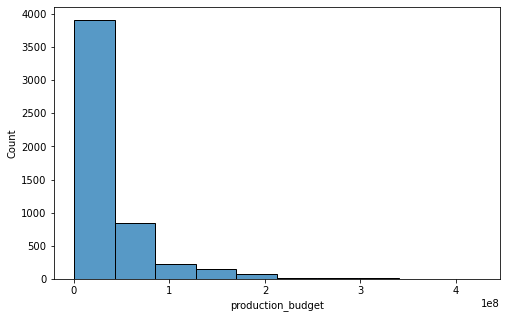

In [227]:
plt.figure(figsize = (8,5))
sns.histplot(budgets['production_budget'], bins=10);

In [233]:
budgets[(budgets['production_budget'] < 100000)].sort_values('release_date')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_million,roi
5745,46,1972-06-30,Deep Throat,25000.0,45000000.0,45000000.0,44.975000,1799.000000
5699,100,1972-08-30,The Last House on the Left,87000.0,3100000.0,3100000.0,3.013000,34.632184
5733,34,1991-07-01,The Last Waltz,35000.0,321952.0,322563.0,0.287563,8.216086
5752,53,1991-08-01,Slacker,23000.0,1227508.0,1227508.0,1.204508,52.369913
5773,74,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,2.034928,290.704000
5742,43,1994-10-19,Clerks,27000.0,3073428.0,3894240.0,3.867240,143.231111
5715,16,1995-08-09,The Brothers McMullen,50000.0,10426506.0,10426506.0,10.376506,207.530120
5769,70,1996-04-01,Bang,10000.0,527.0,527.0,-0.009473,-0.947300
5762,63,1997-04-11,Pink Flamingos,12000.0,413802.0,413802.0,0.401802,33.483500
5746,47,1997-08-01,In the Company of Men,25000.0,2883661.0,2883661.0,2.858661,114.346440


ROI and Profit vs Genre 
ROI and Profit vs Decade
Movies made per decade
best month to release
Budget per Genre
worst 100vs top 100s


easier to just remove these columns as I am not sure of the reasons for both columns being zero, I suspected it could be that the films have only been released domestically, but considering the length of both dataframes is the same, this is not the case.

In [237]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_million,roi,budget_million
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2351.345279,5.532577,425.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,635.063875,1.546673,410.6
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-200.237650,-0.572108,350.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1072.413963,3.243841,330.6
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,999.721747,3.153696,317.0


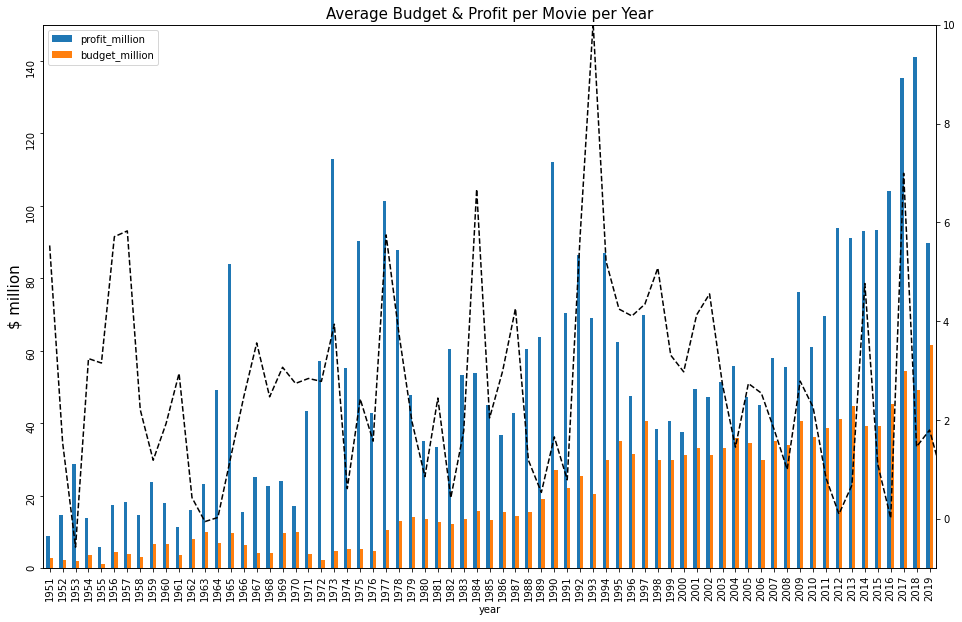

In [261]:
#budgets['budget_million'] = budgets['production_budget'] / 1000000
#budgets['year'] = budgets['release_date'].dt.year

figure = budgets[budgets['year']>1950].groupby(budgets['year'])[['profit_million', 'budget_million']].mean().plot.bar(figsize=(16,10))
figure.set_ylabel('$ million', fontsize = 15)
figure.set_ylim(0,150)
figure.set_title('Average Budget & Profit per Movie per Year', fontsize=15);
budgets['roi'].plot(linestyle='dashed', color= 'black', secondary_y=True)
figure.right_ax.set_ylim(-1,10)
figure.tick_params(labelrotation=90)

Text(0, 0.5, 'ROI')

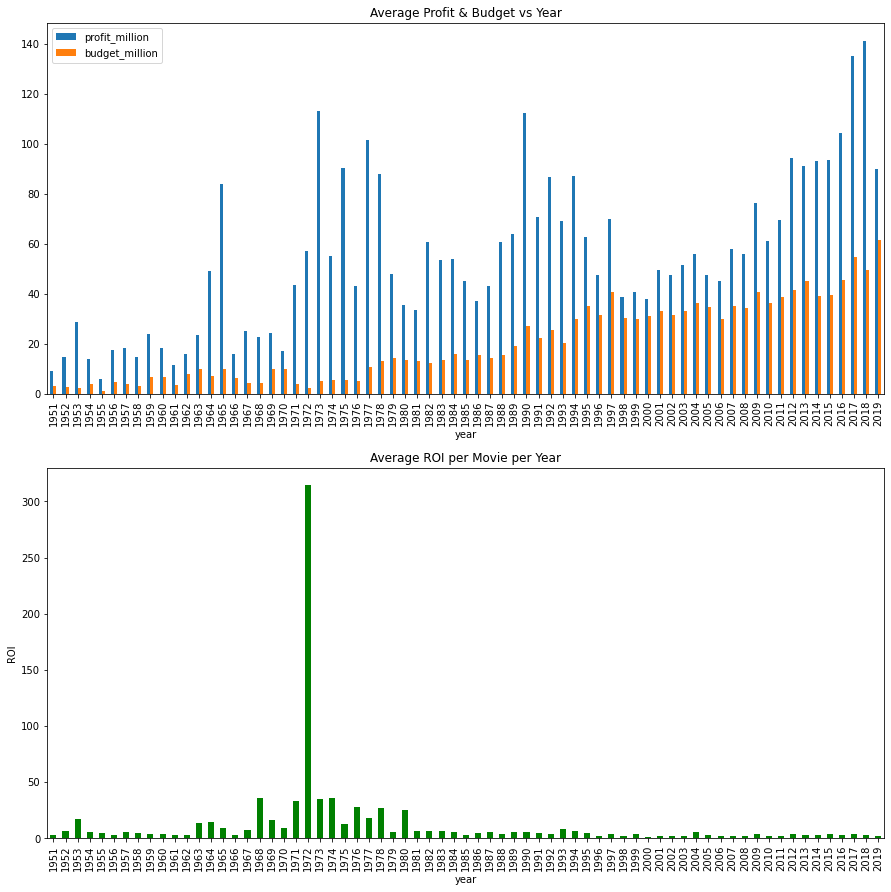

In [284]:
# fig, axs = plt.subplots(2)
# fig.suptitle('Profit / Budget / ROI through Time')
# axs[0] = budgets[budgets['year']>1950].groupby(budgets['year'])[['profit_million', 'budget_million']].mean().plot.bar
# axs[1] = budgets[budgets['year']>1950].groupby(budgets['year'])['roi'].mean().plot.bar

fig, axes = plt.subplots(2,1)

budgets[budgets['year']>1950].groupby(budgets['year'])[['profit_million', 'budget_million']].mean().plot.bar(figsize=(15,15), ax=axes[0])
budgets[budgets['year']>1950].groupby(budgets['year'])['roi'].mean().plot.bar(color='darkseagreen',ax=axes[1])
axes[0].set_title('Average Profit & Budget vs Year')
axes[1].set_title('Average ROI per Movie per Year')
axes[1].set_ylabel('ROI')

This plot clearly shows how the movie industry has changed over the years, the figures from the 1970s cause the scale to become skewed and difficult to see any insights in the more recent and relevant data. Pre-1980s production budgets were small but movies could 'trend' and become worldwide hits. More recently, investment in films has become higher as each studio compete to have the best special effects, actors with the biggest pull and directors with the best reputations. 

Text(0, 0.5, 'ROI')

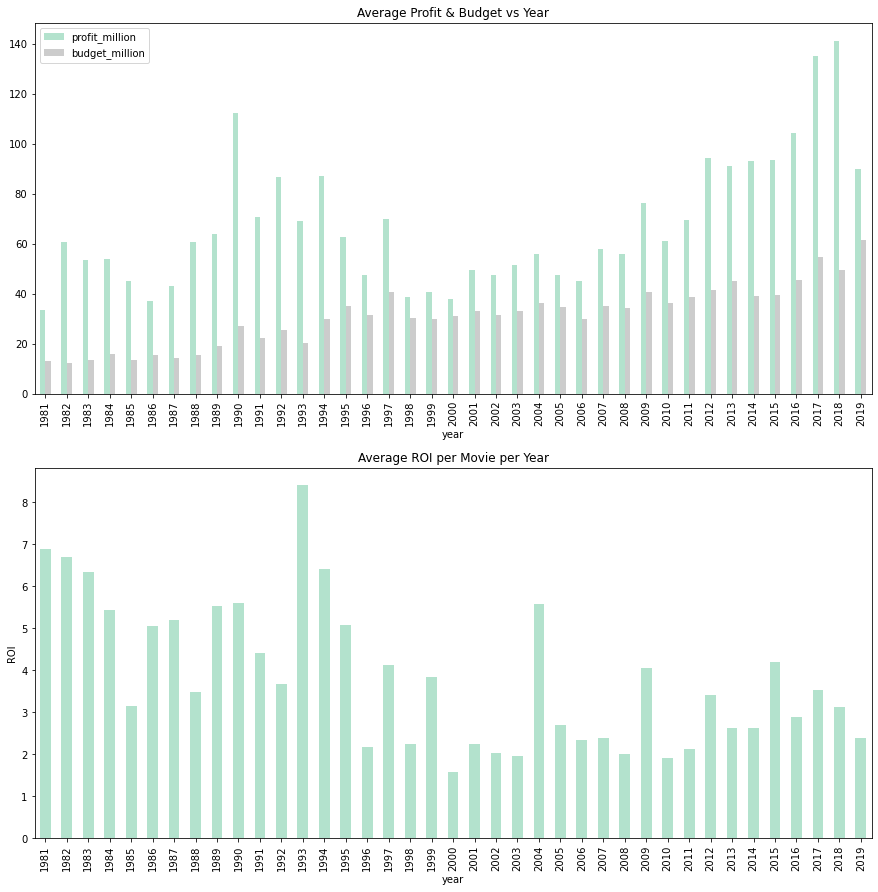

In [296]:
fig, axes = plt.subplots(2,1)

budgets[budgets['year']>1980].groupby(budgets['year'])[['profit_million', 'budget_million']].mean().plot.bar(figsize=(15,15), ax=axes[0], colormap='Pastel2')
budgets[budgets['year']>1980].groupby(budgets['year'])['roi'].mean().plot.bar(colormap='Pastel2',ax=axes[1])
axes[0].set_title('Average Profit & Budget vs Year')
axes[1].set_title('Average ROI per Movie per Year')
axes[1].set_ylabel('ROI')

This plot shows that the average movie since 2010 will make between 2-3 dollars for every dollar invested which is a good rate of return. Lets see how this varies for per genre.

can you use production budget as an indication of profitability?

In [297]:
budgets.corr()

,id,production_budget,domestic_gross,worldwide_gross,profit_million,roi,budget_million,year
id,1.000000,-0.033848,0.009432,-0.009368,-0.001597,0.001478,-0.033848,-0.008647
production_budget,-0.033848,1.000000,0.678207,0.744875,0.605544,-0.058977,1.000000,0.217862
domestic_gross,0.009432,0.678207,1.000000,0.937545,0.926391,0.054095,0.678207,0.074003
worldwide_gross,-0.009368,0.744875,0.937545,1.000000,0.982024,0.039683,0.744875,0.136138
profit_million,-0.001597,0.605544,0.926391,0.982024,1.000000,0.064017,0.605544,0.100744
roi,0.001478,-0.058977,0.054095,0.039683,0.064017,1.000000,-0.058977,-0.118086
budget_million,-0.033848,1.000000,0.678207,0.744875,0.605544,-0.058977,1.000000,0.217862
year,-0.008647,0.217862,0.074003,0.136138,0.100744,-0.118086,0.217862,1.000000


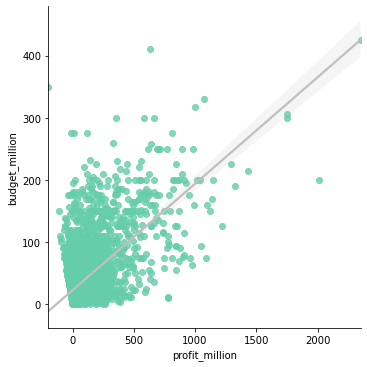

In [320]:

sns.lmplot(data=budgets, x='profit_million', y='budget_million', scatter_kws={'color': 'mediumaquamarine'}, line_kws={'color': 'silver'});


(-10.0, 500.0)

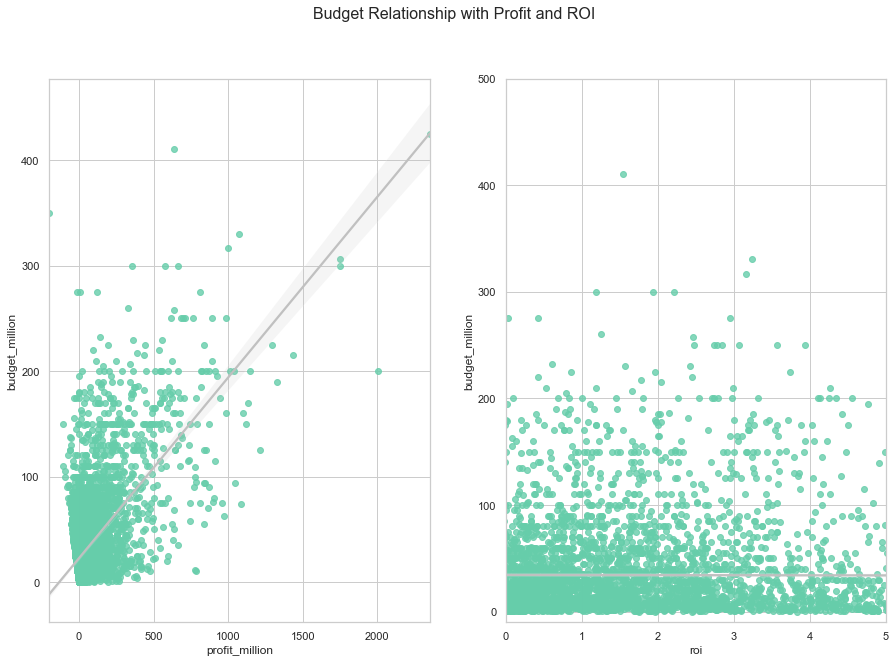

In [566]:
fig, axes = plt.subplots(1,2, figsize=(15,10))
fig.suptitle('Budget Relationship with Profit and ROI', fontsize=16)
axes[0] = sns.regplot(data=budgets, x='profit_million', y='budget_million', scatter_kws={'color': 'mediumaquamarine'}, line_kws={'color': 'silver'}, ax=axes[0])
axes[1] = sns.regplot(data=budgets, x='roi', y='budget_million', scatter_kws={'color': 'mediumaquamarine'}, line_kws={'color': 'silver'}, ax=axes[1])
axes[1].set_xlim(0,5)
axes[1].set_ylim(-10,500)
axes[1].set_ylim(-10,500)

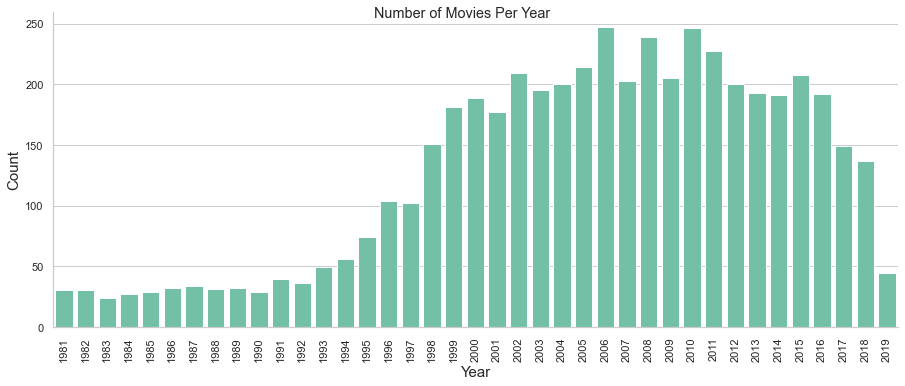

In [393]:
fig2 = sns.catplot(x = 'year', kind = 'count', color='mediumaquamarine', data = budgets[budgets['year']>1980], aspect = 2.5)
fig2.set_xticklabels(rotation=90);
fig2.set_xlabels('Year', fontsize=15)
fig2.set_ylabels('Count', fontsize=15)
fig2.fig.suptitle('Number of Movies Per Year');

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

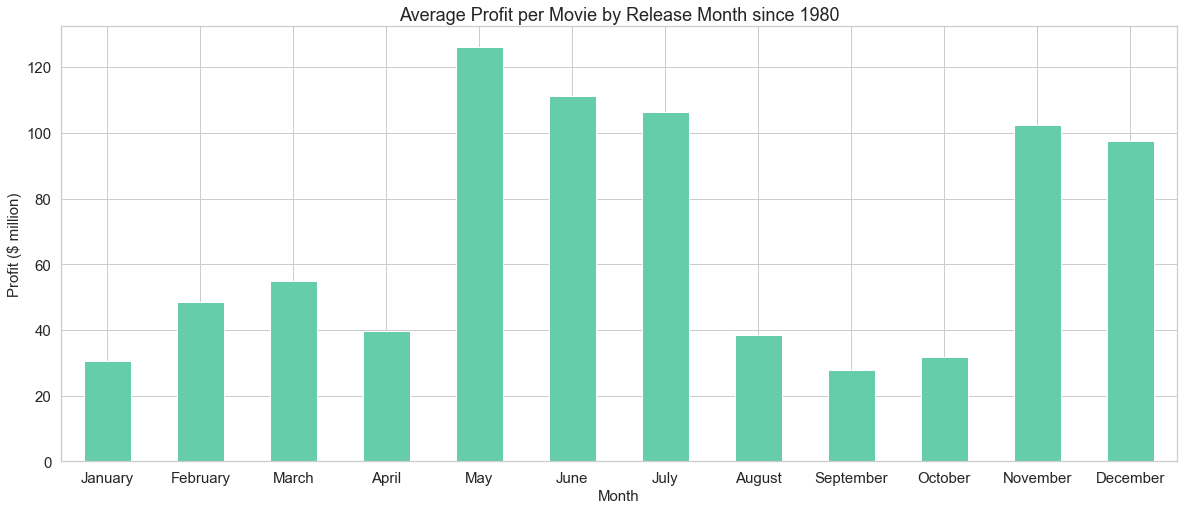

In [495]:
budgets['month'] = budgets['release_date'].dt.month
release_month = budgets[budgets['year']>1980].groupby(['month'])['profit_million'].mean().plot.bar(color='mediumaquamarine', figsize=(20,8))
release_month.set_title('Average Profit per Movie by Release Month since 1980', fontsize=18)
release_month.set_ylabel('Profit ($ million)', fontsize=15)
release_month.set_xlabel('Month', fontsize=15)
release_month.tick_params(axis="y", labelsize=15)
release_month.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=0, fontsize=15)

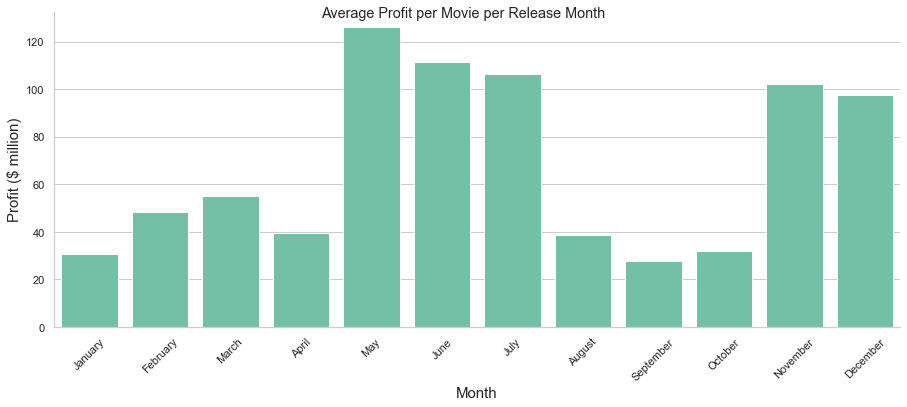

In [502]:
fig3 = sns.catplot(x = 'month', y='profit_million', kind= 'bar', color='mediumaquamarine', data = budgets[budgets['year']>1980], aspect = 2.5, ci=None)
fig3.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45);
fig3.set_xlabels('Month', fontsize=15)
fig3.set_ylabels('Profit ($ million)', fontsize=15)
fig3.fig.suptitle('Average Profit per Movie per Release Month');

In [521]:
bins = [0, 1000000, 25000000, 50000000, 100000000, 200000000, 300000000, np.inf]
names = ['<10m', '10-25m', '25-50m', '50-100m', '100-200m', '200-300m', '>300m']

budgets['budget_bin'] = pd.cut(budgets['production_budget'], bins, labels=names)

budgets.head()
budgets['p&l'] = budgets['roi'].map(lambda x : 1 if x >=0 else 0)
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_million,roi,budget_million,year,month,budget_bin,p&l
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2351.345279,5.532577,425.0,2009,12,>300m,1
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,635.063875,1.546673,410.6,2011,5,>300m,1
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-200.237650,-0.572108,350.0,2019,6,>300m,0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1072.413963,3.243841,330.6,2015,5,>300m,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,999.721747,3.153696,317.0,2017,12,>300m,1


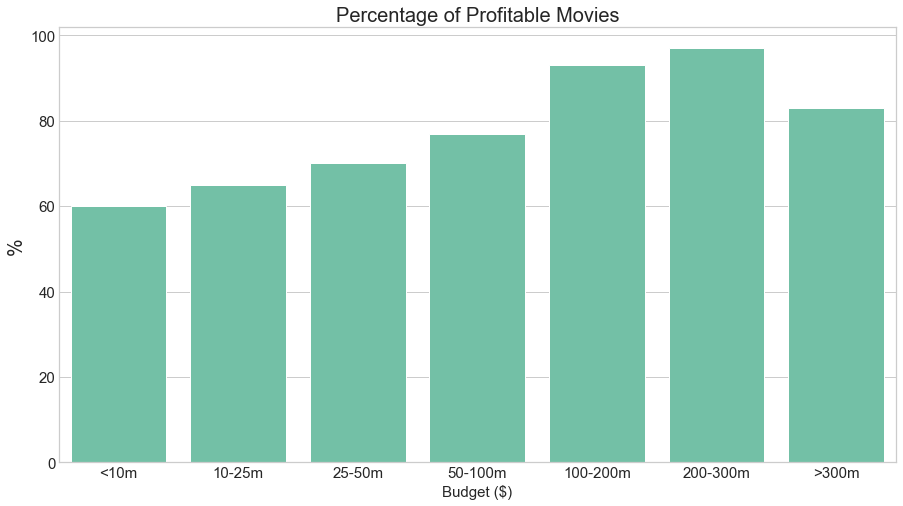

In [548]:


dict_budget = {}
for name in names:
    if name not in dict_budget:
        dict_budget[name] = round(((len(budgets[(budgets['budget_bin'] == name) & (budgets['p&l'] == 1)]) / len(budgets[budgets['budget_bin'] == name]))*100))
dict_budget

x_values = list(dict_budget.keys())
y_values = list(dict_budget.values())

plt.figure(figsize = (15,8))
fig4 = sns.barplot(y = y_values, x = x_values, color = 'mediumaquamarine');

fig4.set_xlabel('Budget ($)', fontsize=15)
fig4.tick_params(labelsize=15, size=0)
fig4.set_ylabel('%', fontsize=20)
fig4.set_title('Percentage of Profitable Movies', fontsize=20);

<Figure size 576x288 with 0 Axes>

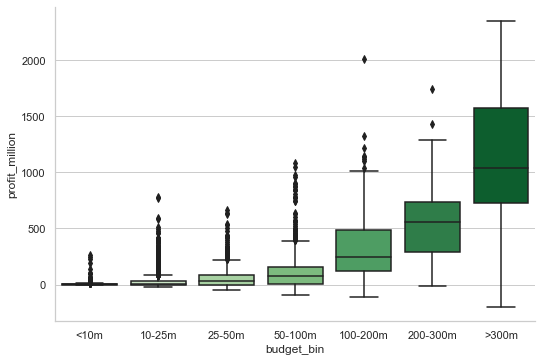

In [558]:
plt.figure(figsize = (8,4))
sns.catplot(x = 'budget_bin', y = 'profit_million', kind = 'box', palette="Greens",
            aspect = 1.5, data = budgets);

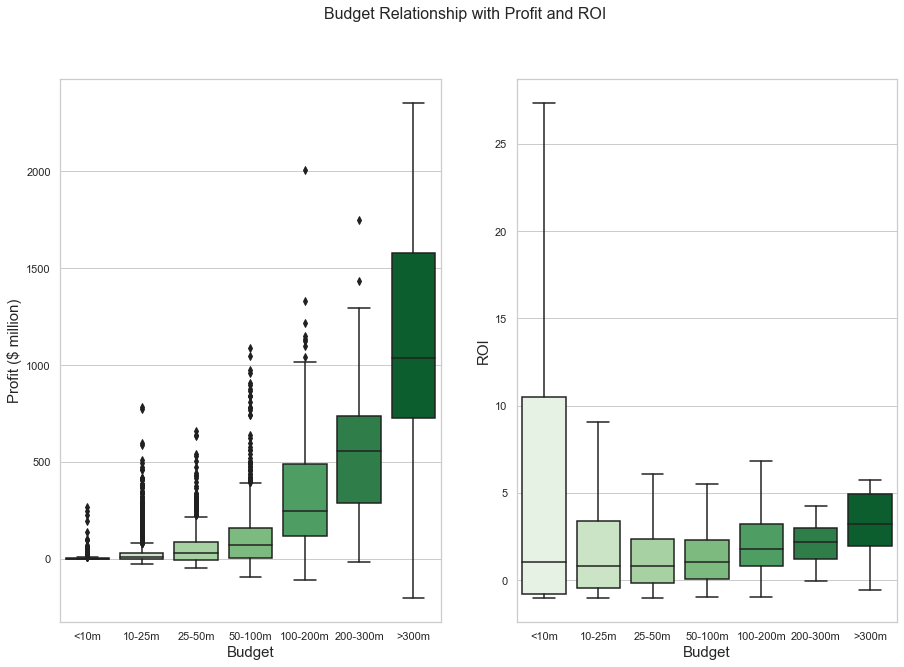

In [576]:
fig, axes = plt.subplots(1,2, figsize=(15,10))
fig.suptitle('Budget Relationship with Profit and ROI', fontsize=16)
axes[0] = sns.boxplot(x = 'budget_bin', y = 'profit_million', palette="Greens", data = budgets, ax=axes[0])
axes[1] = sns.boxplot(x = 'budget_bin', y = 'roi',palette="Greens", data = budgets, ax=axes[1], showfliers=False)
#axes[1].set_xlim(0,5)
#axes[1].set_ylim(-10,500)
#axes[1].set_ylim(-10,500)
axes[1].set_ylabel('ROI', fontsize=15)
axes[0].set_ylabel('Profit ($ million)', fontsize=15)
axes[0].set_xlabel('Budget', fontsize = 15)
axes[1].set_xlabel('Budget', fontsize = 15);
#sns.boxplot(  y="b", x= "a", data=df,  orient='v' , ax=axes[0])
#sns.boxplot(  y="c", x= "a", data=df,  orient='v' , ax=axes[1]

In [555]:
budgets.groupby('budget_bin').mean().head(7)

,id,production_budget,domestic_gross,worldwide_gross,profit_million,roi,budget_million,year,month,p&l
budget_bin,,,,,,,,,,
<10m,50.554707,5.116924e+05,5.175194e+06,8.233505e+06,7.721812,26.001826,0.511692,1999.821883,6.455471,0.600509
10-25m,50.459648,1.128566e+07,2.298609e+07,3.907544e+07,27.789782,3.151277,11.285656,2001.627660,6.867205,0.647469
25-50m,50.594258,3.722113e+07,4.883199e+07,9.236375e+07,55.142622,1.509199,37.221129,2004.951196,6.976077,0.696651
50-100m,51.060734,7.186901e+07,8.367084e+07,1.897931e+08,117.924060,1.630081,71.869014,2005.538136,7.305085,0.768362
100-200m,50.498442,1.456321e+08,1.702234e+08,4.666716e+08,321.039477,2.173885,145.632087,2010.454829,7.059190,0.931464
200-300m,24.000000,2.428286e+08,2.699247e+08,8.054373e+08,562.608736,2.323591,242.828571,2011.857143,6.971429,0.971429
>300m,3.500000,3.565333e+08,5.100306e+08,1.457470e+09,1100.936406,3.102475,356.533333,2014.333333,8.666667,0.833333


In [133]:
print(len(rt_reviews))
rt_reviews.head()

1130017


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [134]:
print(len(rt_movies))
rt_movies.head()

17712


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [135]:
rt_movies[rt_movies['movie_title'] == 'Titanic']

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
1017,m/1056130-titanic,Titanic,"Stuck in an unloving marriage, rich socialite ...",NaN,NR,"Action & Adventure, Classics, Drama, Romance",Jean Negulesco,"Charles Brackett, Walter Reisch, Richard L. Breen","Clifton Webb, Barbara Stanwyck, Robert Wagner,...",1953-04-16,...,20th Century Fox,Fresh,91.0,11.0,Upright,66.0,86441.0,0,10,1
16297,m/titanic,Titanic,"James Cameron's ""Titanic"" is an epic, action-p...",A mostly unqualified triumph for James Cameron...,PG-13,"Drama, Romance",James Cameron,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",1997-12-19,...,Paramount Pictures,Certified-Fresh,89.0,192.0,Upright,69.0,35797635.0,62,171,21


In [578]:
imdb_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [582]:
basics_merged.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0


In [589]:
genres_df = basics_merged.set_index('primary_title').genres.str.split(',', expand=True).stack().reset_index('primary_title')
genres_df.columns=['movie', 'genre']
genres_df.head()

,movie,genre
0,Sunghursh,Action
1,Sunghursh,Crime
2,Sunghursh,Drama
0,One Day Before the Rainy Season,Biography
1,One Day Before the Rainy Season,Drama


In [598]:
budgets.head()
#budgets.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_million,roi,budget_million,year,month,budget_bin,p&l
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2351.345279,5.532577,425.0,2009,12,>300m,1
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,635.063875,1.546673,410.6,2011,5,>300m,1
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-200.237650,-0.572108,350.0,2019,6,>300m,0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1072.413963,3.243841,330.6,2015,5,>300m,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,999.721747,3.153696,317.0,2017,12,>300m,1


In [592]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118305 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   movie   118305 non-null  object
 1   genre   118305 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [603]:
genres_df[genres_df['movie'] == 'Dark Phoenix']
#genres_df.head()

,movie,genre
0,Dark Phoenix,Action
1,Dark Phoenix,Adventure
2,Dark Phoenix,Sci-Fi


In [596]:
genres_profits = genres_df.merge(budgets, how='left', on='movie')

In [597]:
genres_profits.isna().sum()

movie                     0
genre                     0
id                   113045
release_date         113045
production_budget    113045
domestic_gross       113045
worldwide_gross      113045
profit_million       113045
roi                  113045
budget_million       113045
year                 113045
month                113045
budget_bin           113045
p&l                  113045
dtype: int64

In [606]:
genres_profits[genres_profits['movie'] == 'Dark Phoenix']

,movie,genre,id,release_date,production_budget,domestic_gross,worldwide_gross,profit_million,roi,budget_million,year,month,budget_bin,p&l
103539,Dark Phoenix,Action,3.0,2019-06-07,350000000.0,42762350.0,149762350.0,-200.23765,-0.572108,350.0,2019.0,6.0,>300m,0.0
103540,Dark Phoenix,Adventure,3.0,2019-06-07,350000000.0,42762350.0,149762350.0,-200.23765,-0.572108,350.0,2019.0,6.0,>300m,0.0
103541,Dark Phoenix,Sci-Fi,3.0,2019-06-07,350000000.0,42762350.0,149762350.0,-200.23765,-0.572108,350.0,2019.0,6.0,>300m,0.0


In [607]:
genres_profits

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118512 entries, 0 to 118511
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   movie              118512 non-null  object        
 1   genre              118512 non-null  object        
 2   id                 5467 non-null    float64       
 3   release_date       5467 non-null    datetime64[ns]
 4   production_budget  5467 non-null    float64       
 5   domestic_gross     5467 non-null    float64       
 6   worldwide_gross    5467 non-null    float64       
 7   profit_million     5467 non-null    float64       
 8   roi                5467 non-null    float64       
 9   budget_million     5467 non-null    float64       
 10  year               5467 non-null    float64       
 11  month              5467 non-null    float64       
 12  budget_bin         5467 non-null    category      
 13  p&l                5467 non-null    float64 

In [608]:
genres_profits = genres_profits.dropna()

In [613]:
genres_profits.head()

,movie,genre,id,release_date,production_budget,domestic_gross,worldwide_gross,profit_million,roi,budget_million,year,month,budget_bin,p&l
59,On the Road,Adventure,17.0,2013-03-22,25000000.0,720828.0,9313302.0,-15.686698,-0.627468,25.0,2013.0,3.0,10-25m,0.0
60,On the Road,Drama,17.0,2013-03-22,25000000.0,720828.0,9313302.0,-15.686698,-0.627468,25.0,2013.0,3.0,10-25m,0.0
61,On the Road,Romance,17.0,2013-03-22,25000000.0,720828.0,9313302.0,-15.686698,-0.627468,25.0,2013.0,3.0,10-25m,0.0
66,The Secret Life of Walter Mitty,Adventure,37.0,2013-12-25,91000000.0,58236838.0,187861183.0,96.861183,1.064409,91.0,2013.0,12.0,50-100m,1.0
67,The Secret Life of Walter Mitty,Comedy,37.0,2013-12-25,91000000.0,58236838.0,187861183.0,96.861183,1.064409,91.0,2013.0,12.0,50-100m,1.0


In [611]:
genres_profits_df = genres_profits[['movie', 'budget_million', 'profit_million', 'roi', 'year', 'genre']]
genres_profits_df.head()

,movie,budget_million,profit_million,roi,year,genre
59,On the Road,25.0,-15.686698,-0.627468,2013.0,Adventure
60,On the Road,25.0,-15.686698,-0.627468,2013.0,Drama
61,On the Road,25.0,-15.686698,-0.627468,2013.0,Romance
66,The Secret Life of Walter Mitty,91.0,96.861183,1.064409,2013.0,Adventure
67,The Secret Life of Walter Mitty,91.0,96.861183,1.064409,2013.0,Comedy


Text(0.5, 0, 'Profit ($ million)')

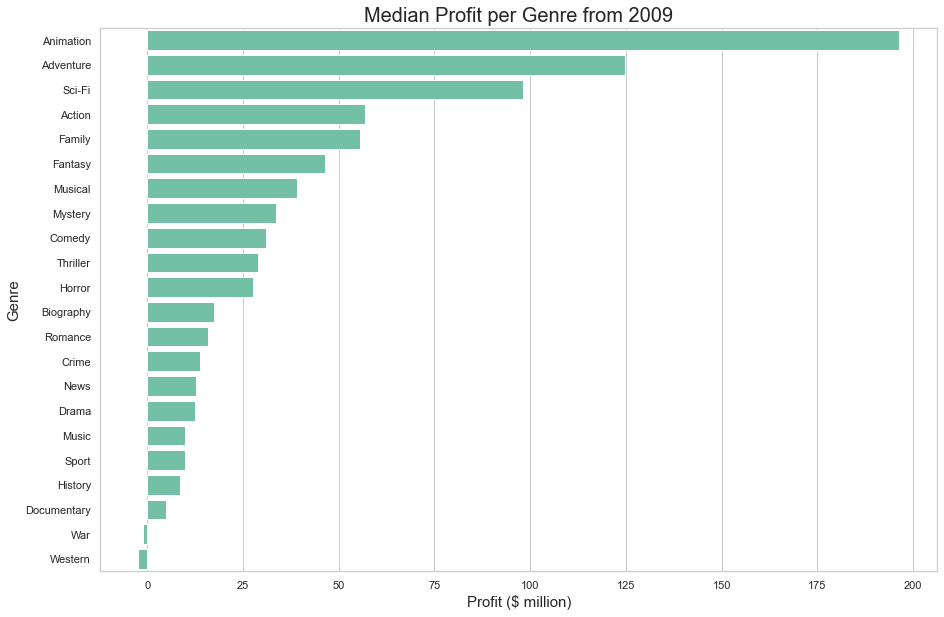

In [686]:
#new_genre_df = genres_profits_df[genres_profits_df['year']>2009].groupby(['genre']).median().sort_values('profit_million', ascending=False)
plt.figure(figsize = (15,10))
fig6 = sns.barplot(y = 'genre', x = 'profit_million', data=new_genre_df, color = 'mediumaquamarine');
fig6.set_title('Median Profit per Genre from 2009', fontsize=20);
fig6.set_ylabel('Genre', fontsize=15)
fig6.set_xlabel('Profit ($ million)', fontsize=15)

In [626]:
genres_profits_df[genres_profits_df['year']>2009].groupby(['genre']).count().head(20)

,movie,budget_million,profit_million,roi,year
genre,,,,,
Action,461,461,461,461,461
Adventure,365,365,365,365,365
Animation,103,103,103,103,103
Biography,155,155,155,155,155
Comedy,556,556,556,556,556
Crime,257,257,257,257,257
Documentary,87,87,87,87,87
Drama,934,934,934,934,934
Family,94,94,94,94,94


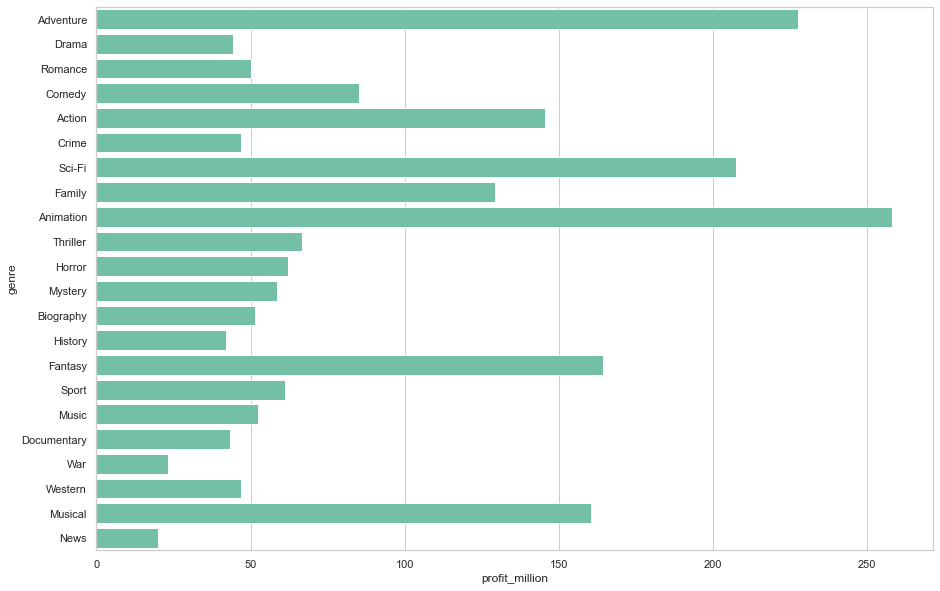

In [665]:
plt.figure(figsize = (15,10))
sns.barplot(y='genre', x = 'profit_million', color='mediumaquamarine', data= genres_profits_df, ci=False);

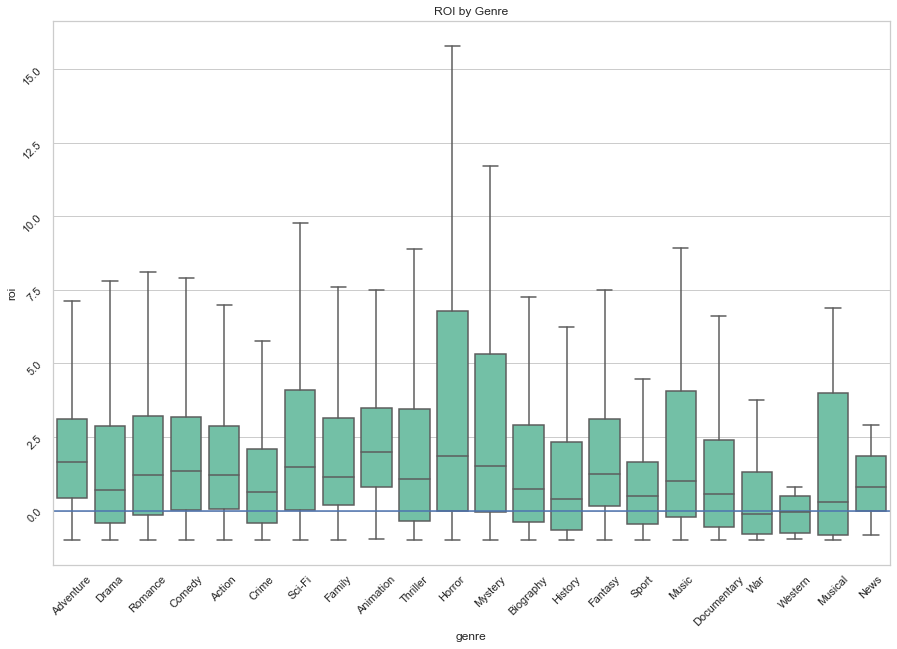

In [663]:
plt.figure(figsize = (15,10))
fig5 = sns.boxplot(y='roi', x = 'genre', color='mediumaquamarine', data= genres_profits_df, showfliers=False);
fig5.set_title('ROI by Genre')
fig5.tick_params(rotation=45)
fig5.axhline()

In [645]:
new_genre_df = new_genre_df.reset_index()

In [717]:
len(genres_profits)

5467

In [671]:
genres_profits.groupby('genre').mean().sort_values('p&l').head(25)

,id,production_budget,domestic_gross,worldwide_gross,profit_million,roi,budget_million,year,month,p&l
genre,,,,,,,,,,
Western,50.750000,5.523333e+07,5.026910e+07,1.022115e+08,46.978169,0.586438,55.233333,2011.583333,8.083333,0.416667
War,51.542857,2.418571e+07,2.192255e+07,4.732638e+07,23.140663,0.619593,24.185714,2011.028571,6.742857,0.485714
Musical,50.388889,4.430556e+07,8.866104e+07,2.048818e+08,160.576247,2.822264,44.305556,2007.777778,6.777778,0.500000
History,48.432836,3.214642e+07,3.544194e+07,7.420252e+07,42.056104,2.482864,32.146418,2011.865672,7.179104,0.597015
Sport,53.836364,2.633091e+07,4.462040e+07,8.765283e+07,61.321918,4.047565,26.330909,2011.000000,7.727273,0.618182
Biography,52.872222,2.649912e+07,3.758818e+07,7.781435e+07,51.315230,4.283876,26.499117,2011.916667,7.872222,0.633333
Crime,49.422951,3.123507e+07,3.581006e+07,7.802851e+07,46.793446,1.552199,31.235069,2011.498361,6.773770,0.645902
Documentary,46.472727,2.583367e+07,3.525784e+07,6.928168e+07,43.448015,3.987353,25.833669,2006.290909,7.030303,0.648485
Drama,50.882166,2.627849e+07,3.329894e+07,7.061547e+07,44.336981,3.091699,26.278487,2009.988057,7.019904,0.652866


In [687]:
genres_profits_df[genres_profits_df['genre']=='Animation'][['movie','budget_million', 'profit_million', 'roi']].sort_values('profit_million', ascending=False).head(25)

,movie,budget_million,profit_million,roi
37034,Frozen,150.0,1122.469910,7.483133
37004,Minions,74.0,1086.336173,14.680219
65509,Incredibles 2,200.0,1042.520711,5.212604
62663,Despicable Me 3,75.0,959.727750,12.796370
13406,Despicable Me 2,76.0,899.216835,11.831800
52277,Zootopia,150.0,869.429616,5.796197
160,Toy Story 3,200.0,868.879522,4.344398
36382,Finding Dory,200.0,821.215193,4.106076
48285,The Secret Life of Pets,75.0,811.750534,10.823340
34321,The Jungle Book,175.0,787.854547,4.502026


In [682]:
genres_profits_df[genres_profits_df['genre']=='Horror'][['movie', 'profit_million', 'roi']].sort_values('profit_million', ascending=False).head(25)

,movie,profit_million,roi
17688,Avatar,2351.345279,5.532577
4648,It,662.457969,18.927371
106562,Coco,623.008101,3.560046
32392,Ghost,495.600000,22.527273
59464,The Revenant,397.938302,2.947691
83047,The Meg,351.530715,1.974892
563,World War Z,341.514650,1.797446
104072,A Quiet Place,317.522294,18.677782
5637,The Conjuring,298.000141,14.900007
87823,Annabelle: Creation,290.384865,19.358991


Clearly some of the genre allocations are incorrect and this can have a big impact on the ROI and profit averages for the Horror genre. Movies such as Avatar, Ghost, Now You See Me, coco appears in both animation and horror genre for example and this is clearly an animated movie. 

Future work could include verifying the most profitable genres by cross checking against another source.

Next I will investigate the connection between rating and profit - I will then try and find a shortlist of directors to create animated movie.

In [708]:
import altair as alt

selection = alt.selection_multi(fields=['genre'], bind='legend')

In [714]:
alt.Chart(genres_profits[0:5000]).mark_circle(size=50).\
encode(x='profit_million', y='budget_million', \
       color = alt.Color('genre:N', scale=alt.Scale(scheme='category20b')), tooltip=['movie', 'profit_million'], \
       opacity=alt.condition(selection, alt.value(1), alt.value(0.05))).properties(height=700, width=800, title='Budget vs Profit by Genre').add_selection(selection)



alt.Chart(...)

In [745]:
rt_movies.head()
rt_new = rt_movies[['movie_title', 'directors', 'actors','authors', 'audience_rating', 'audience_count']]

# rt_new.head()
rt_new = rt_new.rename(columns={"movie_title" : "movie"})
rt_new.head()
rt_new.columns

Index(['movie', 'directors', 'actors', 'authors', 'audience_rating',
       'audience_count'],
      dtype='object')

In [746]:
directors = genres_profits_df.merge(rt_new, how='left', on='movie')
directors_animated = directors[directors['genre']=='Animation']
directors_animated.sort_values('profit_million', ascending=False).head(25)

,movie,budget_million,profit_million,roi,year,genre,directors,actors,authors,audience_rating,audience_count
3545,Frozen,150.0,1122.469910,7.483133,2013.0,Animation,Adam Green,"Emma Bell, Shawn Ashmore, Kevin Zegers, Ed Ack...",Adam Green,46.0,20649.0
3546,Frozen,150.0,1122.469910,7.483133,2013.0,Animation,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Josh Gad, Santino ...",Jennifer Lee,85.0,306743.0
3538,Minions,74.0,1086.336173,14.680219,2015.0,Animation,"Pierre Coffin, Kyle Balda","Chris Renaud, Hiroyuki Sanada, Michael Beattie...",Brian Lynch,49.0,136913.0
4994,Incredibles 2,200.0,1042.520711,5.212604,2018.0,Animation,Brad Bird,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",Brad Bird,84.0,18445.0
4863,Despicable Me 3,75.0,959.727750,12.796370,2017.0,Animation,"Kyle Balda, Pierre Coffin, Eric Guillon","Steve Carell, Kristen Wiig, Trey Parker, Miran...","Ken Daurio, Cinco Paul",53.0,78655.0
2207,Despicable Me 2,76.0,899.216835,11.831800,2013.0,Animation,"Pierre Coffin, Chris Renaud","Steve Carell, Kristen Wiig, Benjamin Bratt, Mi...","Cinco Paul, Ken Daurio",85.0,369759.0
4433,Zootopia,150.0,869.429616,5.796197,2016.0,Animation,"Byron Howard, Rich Moore, Jared Bush","J.K. Simmons, Kristen Bell, Octavia Spencer, A...","Jared Bush, Phil Johnston",92.0,101511.0
38,Toy Story 3,200.0,868.879522,4.344398,2010.0,Animation,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...","Lee Unkrich, Andrew Stanton, John Lasseter, Mi...",89.0,607537.0
3513,Finding Dory,200.0,821.215193,4.106076,2016.0,Animation,"Andrew Stanton, Angus MacLane","Ed O'Neill, Dominic West, Andrew Stanton, Benn...","Andrew Stanton, Victoria Strouse",84.0,181985.0
4218,The Secret Life of Pets,75.0,811.750534,10.823340,2016.0,Animation,"Yarrow Cheney, Chris Renaud","Kevin Hart, Lake Bell, Michael Beattie, Kiely ...","Cinco Paul, Ken Daurio, Brian Lynch",62.0,82507.0


In [739]:
directors_animated.describe()

,budget_million,profit_million,roi,year,audience_rating,audience_count
count,135.000000,135.000000,135.000000,135.000000,128.000000,128.000000
mean,91.704285,253.321534,6.270344,2011.548148,64.828125,96350.101562
std,57.624491,282.358026,16.927277,10.309913,18.155544,133108.085761
min,0.500000,-110.450242,-0.978380,1940.000000,22.000000,90.000000
25%,47.500000,42.454399,0.811088,2011.000000,51.000000,8941.000000
50%,80.000000,159.517956,1.994565,2014.000000,67.000000,54062.000000
75%,135.000000,381.738952,3.853879,2016.000000,80.250000,106101.750000
max,260.000000,1122.469910,88.586336,2019.000000,94.000000,715040.000000


Considering it is an animated movie, I would infer the lead actors would not have as high a bearing on the success, that being said very successful animated movies tend to have some household names so it is not something to overlook. For this study I will try and find the best writers from the most successful animated movies. 

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [6]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***